<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/projects/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#@title Imports and Kaggle Setup
import pandas as pd
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# path for kaggle.json file
kaggle_filepath = './drive/MyDrive/colab/kaggle.json'

# upload the kaggle.json file to colab runtime
shutil.copy(kaggle_filepath, '/content/')

# Kaggle setup for getting datasets from kaggle
# ! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!ls

Mounted at /content/drive
drive  kaggle.json  sample_data


In [2]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 102MB/s]


In [3]:
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
ls

data_description.txt                             kaggle.json            test.csv
drive/                                           sample_data/           train.csv
house-prices-advanced-regression-techniques.zip  sample_submission.csv


In [5]:
house_train = pd.read_csv('./train.csv', usecols = lambda column : column != 'Id')
house_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
columns = np.array(house_train.columns)
columns

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [7]:
house_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
price = house_train['SalePrice']
price

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

<Axes: xlabel='SalePrice', ylabel='Count'>

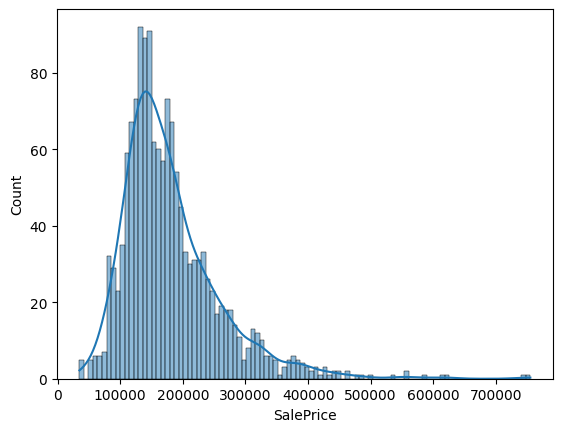

In [9]:
# plt.plot(price)
%matplotlib inline
sns.histplot(price, bins = 100, kde = True)

In [10]:
price.skew(), price.kurt() # skewness tells you about the symmetry or lack of symmetry in a distribution, while kurtosis tells you about the tails and the peak of the distribution

(1.8828757597682129, 6.536281860064529)

<ipython-input-11-17ab3920fe4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house_train.corr()


<Axes: >

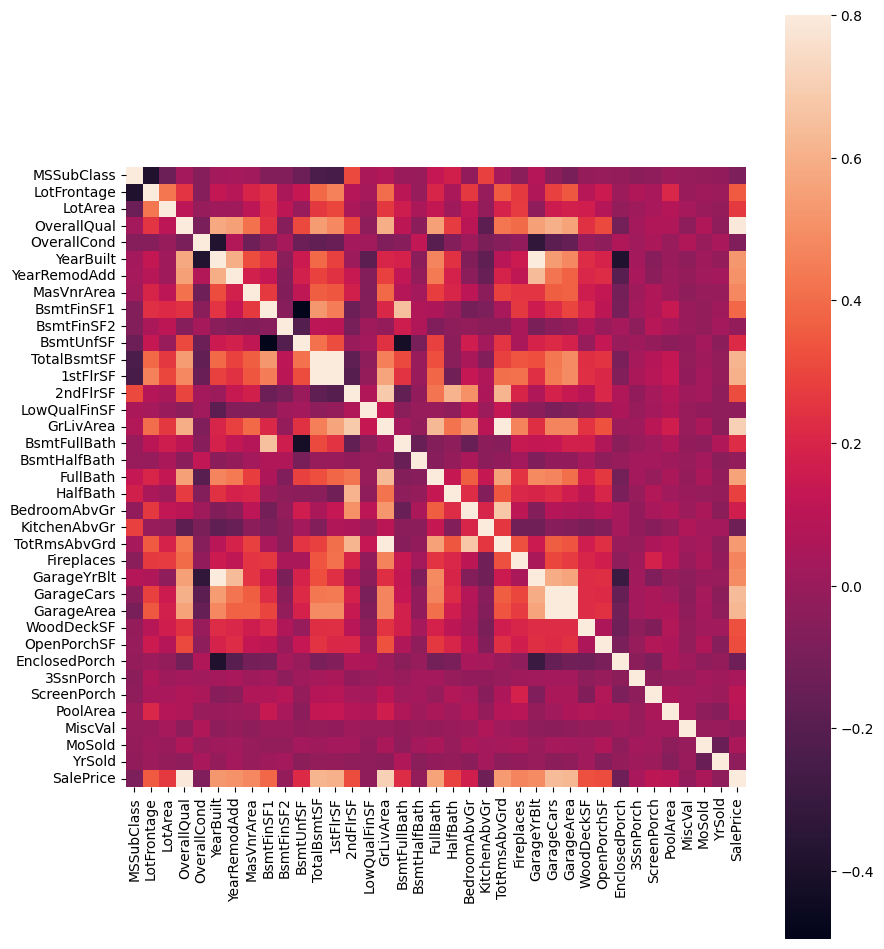

In [11]:
# Let's see some using the heat-map if we can at all
corr_matrix = house_train.corr()
# corr_matrix
# plot the correlation matrix
plt.figure(figsize=(10,12))
sns.heatmap(corr_matrix,  vmax = 0.8, square = True)

12


<Axes: >

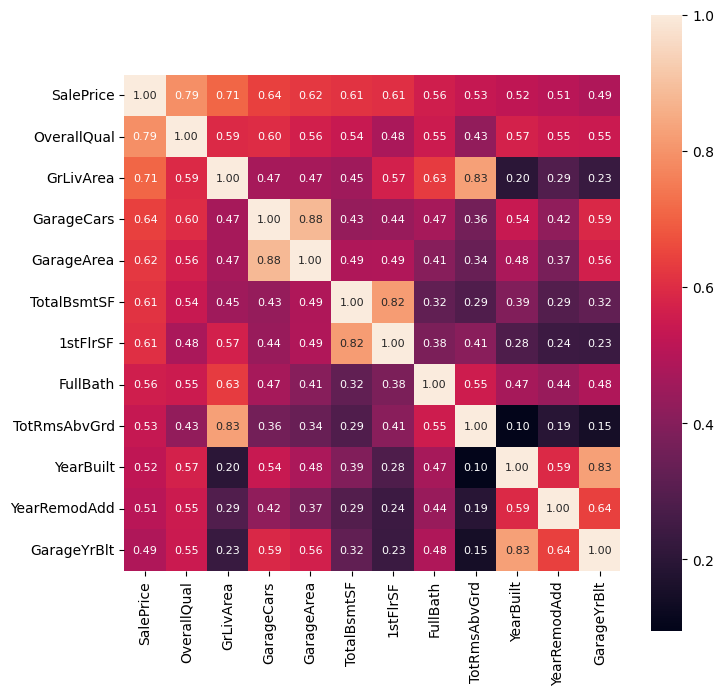

In [12]:
## seeing some of the most correlated features with the price
cols = corr_matrix.nlargest(12, 'SalePrice')['SalePrice'].index
corr_matrix = house_train[cols].corr()  # get correlation matrix for these columns
print(len(cols))
# plot the heatmap for the selected columns
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, square = True, annot=True, fmt='.2f', annot_kws={'size':8})

In [ ]:
# sns.pairplot(house_train[cols], height=3.5)
# plt.show()

# this was just for the show, didn't get anything significant from this though

In [13]:
# Working on the missing data
null_count = house_train.isnull().sum().sort_values(ascending = False) # get count of null values in decreasing order
null_count = null_count[null_count > 0]
percentage = (null_count / house_train.shape[0]) * 100
missing_data = pd.DataFrame({'Count':null_count, 'Percentage':percentage})
missing_data

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [31]:
# Surely dropping the columns with more than 17% missing data
drop_cols = percentage[percentage > 17.0].index
drop_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [ ]:
impute_cols = percentage[percentage < 17.0].index

# seeing the datatypes and imputation will be done accordingly
float_cols = []
obj_cols = []

for col in impute_cols :
    print(f"{col} : {house_train[col].dtype}")
    if house_train[col].dtype != 'object' : float_cols.append(col)
    else : obj_cols.append(col)

print(f"Float Cols : {float_cols} \n String Cols : {obj_cols}")

In [ ]:
# impute the string features with mode of features
for col in obj_cols :
    mode = house_train[col].mode()
    house_train[col].fillna(mode[0], inplace = True)
    print(col, mode)

# impute the float columns with median value
for col in float_cols :
    median = house_train[col].median()
    house_train[col].fillna(median , inplace = True)
    print(col, median)

In [ ]:
# checking for null values
house_train.isnull().sum().sort_values(ascending = False)

In [33]:
# dropping the cols in drop_cols
for col in drop_cols :
    if col in house_train :
        house_train.drop(axis = 1, labels = [col], inplace = True)
        print(f"Dropped col : {col}")

In [ ]:
house_train.isnull().sum().sort_values(ascending = False)

In [ ]:
house_train

In [ ]:
count_cols = [0]

for col in list(house_train.columns):
    if house_train[col].dtype == 'object' :
        count = house_train[col].value_counts()
        if len(count) < 11 :
            print(f"{col} ->{len(count)}")
            count_cols[0] += len(count)
        else : count_cols.append([col, len(count)])

count_cols

In [66]:
# one-hot encoding the categorical columns

cat_cols = house_train.select_dtypes(include = ['object']).columns
num_cols = house_train.select_dtypes (exclude = ['object']).columns

house_encoded = pd.get_dummies(house_train, columns = cat_cols)
house_encoded

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [68]:
house_encoded.isnull().sum().value_counts() # total columns with null values

0    270
dtype: int64

In [82]:
# different functions for evaluation of predicted and true values
from sklearn import metrics

def evaluate_prediction(pred, true):
    mae = metrics.mean_absolute_error(true, pred)
    mse = metrics.mean_squared_error(true, pred)
    print(f"mean-error : {mae} \n mean-squared-error : {mse}\n\n")
    return [mae, mse]


In [142]:
# Since we are done with the data part we can move to model-training and prediction part
from sklearn.model_selection import train_test_split

x = house_encoded.drop(axis=1, labels=['SalePrice'])
y = house_encoded['SalePrice']

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.22)
x_train.shape, x_test.shape

((1138, 269), (322, 269))

In [143]:
# normalization of the data

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('std_scalar', StandardScaler())
])
x_train = pipe.fit_transform(x_train)
x_test = pipe.transform(x_test)

### Linear Regression Model

In [144]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

intercept, coefficient = lin_model.intercept_, lin_model.coef_
intercept, len(coefficient)

(181318.84346902734, 269)

In [156]:
preds = lin_model.predict(x_test)
len(preds)
mae, mse = evaluate_prediction(y_test, preds)
results = pd.DataFrame(data = [["Linear Regression", mae, mse]], columns = ['Model Type', 'MAE', 'MSE'])
results

mean-error : 36530776955214.56 
 mean-squared-error : 1.8022563103439326e+29




,Model Type,MAE,MSE
0,Linear Regression,3.653078e+13,1.802256e+29


In [146]:
result = pd.DataFrame({'Actual Price' : y_test, 'Predicted Price' : [f"{x:.2f}" for x in preds]}).reset_index(drop=True)
result['Difference'] = abs(result['Actual Price'] - result['Predicted Price'].astype(float))
result

,Actual Price,Predicted Price,Difference
0,212000,234547.41,22547.41
1,102000,113356.53,11356.53
2,189000,185398.41,3601.59
3,287090,273150.84,13939.16
4,235000,235549.66,549.66
...,...,...,...
317,178000,173774.16,4225.84
318,244600,234100.34,10499.66
319,153500,167747.66,14247.66
320,228000,247514.22,19514.22


### SGD Regressor

In [147]:
from sklearn.linear_model import SGDRegressor

x_train, y_train,

sgd_model = SGDRegressor(
    n_iter_no_change=50,
    eta0 = 0.0001,
    max_iter = 10000,
)

sgd_model.fit(x_train, y_train)
sgd_model.intercept_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([181319.15529563])

In [162]:
sgd_preds = sgd_model.predict(x_test)
len(sgd_preds)
sgd_mae, sgd_mse = evaluate_prediction(y_test, sgd_preds)

sgd_result = pd.DataFrame({'Actual Price' : y_test, 'Predicted Price' : [f"{x:.2f}" for x in sgd_preds]}).reset_index(drop=True)
sgd_result['Difference'] = abs(sgd_result['Actual Price'] - sgd_result['Predicted Price'].astype(float))

results = results.append(pd.DataFrame(data = [['SGD Regression', sgd_mae, sgd_mse]], columns = ['Model Type', 'MAE', 'MSE']))
results

mean-error : 16236.404914413815 
 mean-squared-error : 709075813.6861911




<ipython-input-162-86412e20edf9>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(data = [['SGD Regression', sgd_mae, sgd_mse]], columns = ['Model Type', 'MAE', 'MSE']))


,Model Type,MAE,MSE
0,Linear Regression,3.653078e+13,1.802256e+29
0,SGD Regression,1.623640e+04,7.090758e+08
0,SGD Regression,1.807216e+04,9.167076e+08
0,SGD Regression,1.780062e+04,8.372470e+08
0,Random Forests Regression,1.768797e+04,9.239090e+08
0,SGD Regression,1.623640e+04,7.090758e+08


### Using Random Forests

In [161]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators = 100,
)

rf_model.fit(x_train, y_train)

rf_preds = rf_model.predict(x_test)
len(rf_preds)

rf_mae, rf_mse= evaluate_prediction(y_test, rf_preds)

rf_result = pd.DataFrame({'Actual Price' : y_test, 'Predicted Price' : [f"{x:.2f}" for x in rf_preds]}).reset_index(drop=True)
rf_result['Difference'] = abs(rf_result['Actual Price'] - rf_result['Predicted Price'].astype(float))

results = results.append(pd.DataFrame(data = [['Random Forests Regression', rf_mae, rf_mse]], columns = ['Model Type', 'MAE', 'MSE']))
results

mean-error : 17687.967826086955 
 mean-squared-error : 923908979.1398255




<ipython-input-161-6f99735b322d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(data = [['Random Forests Regression', rf_mae, rf_mse]], columns = ['Model Type', 'MAE', 'MSE']))


,Model Type,MAE,MSE
0,Linear Regression,3.653078e+13,1.802256e+29
0,SGD Regression,1.623640e+04,7.090758e+08
0,SGD Regression,1.807216e+04,9.167076e+08
0,SGD Regression,1.780062e+04,8.372470e+08
0,Random Forests Regression,1.768797e+04,9.239090e+08
